## Viewing data

In [224]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import talib
from datetime import datetime,date,time,timedelta
from datetime import datetime as dtt
import pandas_datareader as data
import mpl_finance as mpf

df_2016 = pd.read_csv('data/TWSE2016.csv',low_memory=False)
df_2017 = pd.read_csv('data/TWSE2017.csv',low_memory=False)
df_2018 = pd.read_csv('data/TWSE2018.csv',low_memory=False)

df = pd.concat([df_2018,df_2017,df_2016]) ## 合併三年dataframe
df.head()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE
0,1101 台泥,2018/12/28,35.4,35.75,35.4,35.6,"8,117","288,722","3,471","5,108,059",9.78,1.07
1,1102 亞泥,2018/12/28,33.55,34.3,33.55,33.95,"5,297","180,516","1,916","3,361,447",10.38,0.83
2,1103 嘉泥,2018/12/28,13.5,13.6,13.45,13.6,200,"2,707",78,"774,780",4.81,0.42
3,1104 環泥,2018/12/28,18.8,18.9,18.8,18.9,69,"1,310",52,"653,609",10.8,0.70
4,1108 幸福,2018/12/28,7.34,7.35,7.34,7.34,31,229,18,"404,738",0,0.68


In [10]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692407 entries, 0 to 223599
Data columns (total 12 columns):
證券代碼          692407 non-null object
年月日           692407 non-null object
開盤價(元)        692407 non-null object
最高價(元)        692407 non-null object
最低價(元)        692407 non-null object
收盤價(元)        692407 non-null object
成交量(千股)       692407 non-null object
成交值(千元)       692407 non-null object
成交筆數(筆)       692407 non-null object
流通在外股數(千股)    692407 non-null object
本益比-TSE       666611 non-null object
股價淨值比-TSE     654035 non-null float64
dtypes: float64(1), object(11)
memory usage: 68.7+ MB


Index(['證券代碼', '年月日', '開盤價(元)', '最高價(元)', '最低價(元)', '收盤價(元)', '成交量(千股)',
       '成交值(千元)', '成交筆數(筆)', '流通在外股數(千股)', '本益比-TSE', '股價淨值比-TSE'],
      dtype='object')

In [11]:
df[df['證券代碼'].str.contains("2456")].head()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE
358,2456 奇力新,2018/12/28,80.1,80.4,78,78.5,"4,436","349,209","3,533","243,175",6.21,0.79
1336,2456 奇力新,2018/12/27,82,82,79.5,79.5,"4,913","396,744","3,699","243,013",6.29,0.80
2314,2456 奇力新,2018/12/26,82.9,84,79,79,"4,451","363,508","3,432","243,013",6.25,0.79
3292,2456 奇力新,2018/12/25,83,83,81.6,82,"2,944","242,117","2,219","243,013",6.49,0.82
4270,2456 奇力新,2018/12/24,84.5,84.5,83.3,84.3,"2,286","192,409","1,671","243,013",6.67,0.84


## Stock view and graph

In [12]:
df['年月日'] = pd.to_datetime(df['年月日'], format = '%Y/%m/%d') ## 日期格式化
df['月'] = df['年月日'].dt.month #新增“月”欄位

## 找出奇力新股票，轉成DataFrame
df_2456 = pd.DataFrame(df[df['證券代碼'].str.contains("2456")])
df_2456 = df_2456.reset_index(drop=True) #reset index

In [13]:
df_2456 = df_2456.reindex(index=df_2456.index[::-1]) ## DataFrame 反轉
df_2456 = df_2456.reset_index(drop=True) #reset index
df_2456.head()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE,月
0,2456 奇力新,2016-01-04,80.44,81.74,78.18,80.2,"4,389","297,206","2,710","126,969",15.89,2.32,1
1,2456 奇力新,2016-01-05,80.55,85.06,79.25,85.06,"6,701","468,760","4,200","126,969",16.85,2.46,1
2,2456 奇力新,2016-01-06,84.82,85.77,82.45,83.28,"4,844","344,247","3,115","126,970",16.5,2.41,1
3,2456 奇力新,2016-01-07,83.99,86.48,81.5,82.92,"7,271","518,435","4,288","126,970",16.43,2.40,1
4,2456 奇力新,2016-01-08,80.79,83.52,79.84,80.79,"6,227","428,205","3,491","126,970",16.01,2.34,1


In [14]:
#sma_10 = talib.SMA(np.array(df_2456['收盤價(元)']), 10) 
## 直接這樣打會噴 ”real is not double“ 
## TA-lib不喜歡“真實數據” 要將數據轉成浮點數
# ref: https://stackoverflow.com/questions/22993124/ta-lib-numpy-assertionerror-real-is-not-double

to_float = np.array(df_2456['收盤價(元)'], dtype=float) # 轉成float
sma_10 = talib.SMA(to_float,10) # 10日均線  
sma_30 = talib.SMA(to_float, 30)  # 30日均線
df_2456['10日均線'] = sma_10
df_2456['30日均線'] = sma_30

df_2456['10日均線'] = df_2456['10日均線'].fillna(0.0) # 填補遺漏值
df_2456['30日均線'] = df_2456['30日均線'].fillna(0.0)# 填補遺漏值

In [15]:
df_2456[20:30]

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE,月,10日均線,30日均線
20,2456 奇力新,2016-01-30,76.64,77.47,75.22,76.41,"2,862","184,966","1,843","126,984",15.14,2.21,1,74.678,0.000
21,2456 奇力新,2016-02-01,77,77,74.63,74.75,"1,980","126,307","1,389","126,984",14.81,2.16,2,74.252,0.000
22,2456 奇力新,2016-02-02,74.99,76.76,73.8,75.93,"1,767","112,909","1,291","126,984",15.05,2.20,2,74.560,0.000
23,2456 奇力新,2016-02-03,76.41,78.9,74.99,77,"4,845","316,541","2,778","126,984",15.26,2.23,2,74.963,0.000
24,2456 奇力新,2016-02-15,77,84.7,77,84.7,"9,110","630,988","5,141","126,984",16.78,2.45,2,76.029,0.000
25,2456 奇力新,2016-02-16,85.17,85.89,82.09,82.09,"6,587","465,664","4,204","126,984",16.27,2.37,2,76.704,0.000
26,2456 奇力新,2016-02-17,82.69,83.4,81.74,81.86,"3,646","253,657","2,186","126,984",16.22,2.37,2,77.462,0.000
27,2456 奇力新,2016-02-18,83.28,83.87,81.38,81.62,"3,587","249,397","2,327","126,984",16.17,2.36,2,78.303,0.000
28,2456 奇力新,2016-02-19,81.74,81.86,78.9,79.72,"4,464","300,765","3,200","126,984",15.8,2.31,2,78.990,0.000
29,2456 奇力新,2016-02-22,80.2,80.67,77.83,79.37,"3,118","208,989","2,178","126,984",15.73,2.30,2,79.345,78.141


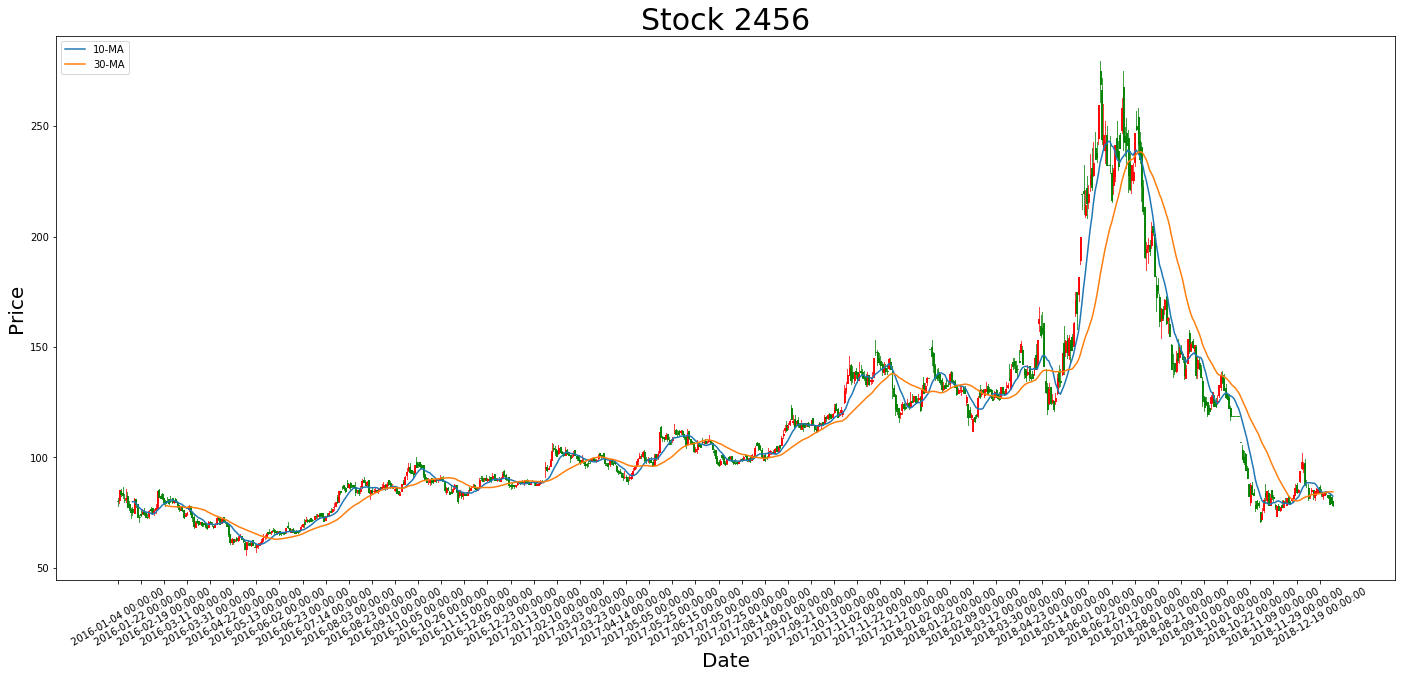

In [16]:
fig = plt.figure(figsize=(24, 10)) ## 繪圖
ax = fig.add_subplot(1,1,1) #單一子圖
ax.set_xticks(range(0,len(df_2456),14))
ax.set_xticklabels(df_2456['年月日'][::14], rotation=30)
ax.set_xlabel('Date',fontsize='20')
ax.set_ylabel('Price',fontsize='20')
ax.set_title('Stock 2456',fontsize='30')


## 先轉float
for i in df_2456.columns:
    if((i == '開盤價(元)')|(i == '最高價(元)')|(i == '最低價(元)')|(i == '收盤價(元)')):
        df_2456[i] = np.array(df_2456[i], dtype=float)

## 蠟燭圖
mpf.candlestick2_ochl(ax,df_2456['開盤價(元)'],df_2456['收盤價(元)'],df_2456['最高價(元)'],df_2456['最低價(元)']
                      ,width=0.6, colorup='r', colordown='g', alpha=0.75)

ax.plot(sma_10, label='10-MA')
ax.plot(sma_30, label='30-MA')
ax.legend(loc=2)

## Finding Reversal point

In [17]:
df_2456['漲幅'] = 0.0
df_2456['漲/跌'] = ''
sigma = 0.03 ## 自訂幅度

for index, row in df_2456.iterrows():
    try:
        ##漲幅 改 (今天收盤 - 昨天收盤/昨天收盤)
        wave = (df_2456.loc[index,'收盤價(元)'] - df_2456.loc[index-1,'收盤價(元)']) / df_2456.loc[index-1,'收盤價(元)']
        df_2456.loc[index,'漲幅'] = wave
        if wave > sigma:
            df_2456.loc[index,'漲/跌'] = '漲'
        elif wave < -sigma:
            df_2456.loc[index,'漲/跌'] = '跌'
        else: 
            df_2456.loc[index,'漲/跌'] = '持平'
    except:
        continue

In [18]:
df_2456[df_2456['漲/跌']=='跌'].head()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE,月,10日均線,30日均線,漲幅,漲/跌
6,2456 奇力新,2016-01-12,82.33,84.23,77.59,77.59,"4,193","287,003","2,724","126,970",15.38,2.24,1,0.000,0.000000,-0.052162,跌
12,2456 奇力新,2016-01-20,79.01,79.01,72.85,72.85,"4,635","294,053","2,743","126,970",14.44,2.11,1,78.373,0.000000,-0.077965,跌
25,2456 奇力新,2016-02-16,85.17,85.89,82.09,82.09,"6,587","465,664","4,204","126,984",16.27,2.37,2,76.704,0.000000,-0.030815,跌
40,2456 奇力新,2016-03-09,76.29,76.29,72.74,73.21,"4,200","262,270","2,733","126,984",14.51,2.12,3,78.076,77.484667,-0.040372,跌
44,2456 奇力新,2016-03-15,77.83,77.95,74.39,74.51,"2,874","184,021","2,026","126,984",14.26,2.12,3,76.181,77.556000,-0.044131,跌


In [31]:
print("奇力新_漲 筆數："+str(len(df_2456[df_2456['漲/跌']=='漲'])))
print("奇力新_跌 筆數："+str(len(df_2456[df_2456['漲/跌']=='跌'])))
print("奇力新_持平 筆數："+str(len(df_2456[df_2456['漲/跌']=='持平'])))

奇力新_漲 筆數：84
奇力新_跌 筆數：76
奇力新_持平 筆數：576


In [22]:
df_2456['交叉種類'] = ''
point_arr = []
for index, row in df_2456.iterrows():
    try:
        if (df_2456.loc[index,'30日均線'] > df_2456.loc[index,'10日均線'] and
        df_2456.loc[index+1,'30日均線'] < df_2456.loc[index+1,'10日均線']):
            df_2456.loc[index,'交叉種類'] ='黃金'
            print('黃金交叉：'+str(df_2456.loc[index,'年月日'])+' index: '+str(index))
            
            point_arr.append(df_2456.iloc[index,:]) ##塞到新array
        elif (df_2456.loc[index,'30日均線'] < df_2456.loc[index,'10日均線'] and 
        df_2456.loc[index+1,'30日均線'] > df_2456.loc[index+1,'10日均線']):
            print('死亡交叉：'+str(df_2456.loc[index,'年月日'])+' index: '+str(index))
            df_2456.loc[index,'交叉種類'] ='死亡'
            point_arr.append(df_2456.iloc[index,:]) ##塞到新array
    except:
        continue

死亡交叉：2016-03-10 00:00:00 index: 41
黃金交叉：2016-05-25 00:00:00 index: 92
死亡交叉：2016-08-31 00:00:00 index: 160
黃金交叉：2016-09-05 00:00:00 index: 163
死亡交叉：2016-09-13 00:00:00 index: 170
黃金交叉：2016-09-14 00:00:00 index: 171
死亡交叉：2016-09-19 00:00:00 index: 172
黃金交叉：2016-09-20 00:00:00 index: 173
死亡交叉：2016-10-21 00:00:00 index: 193
黃金交叉：2016-11-28 00:00:00 index: 219
死亡交叉：2016-12-29 00:00:00 index: 242
黃金交叉：2017-01-23 00:00:00 index: 258
死亡交叉：2017-03-09 00:00:00 index: 284
黃金交叉：2017-04-27 00:00:00 index: 317
死亡交叉：2017-06-16 00:00:00 index: 351
黃金交叉：2017-08-04 00:00:00 index: 386
死亡交叉：2017-12-04 00:00:00 index: 470
黃金交叉：2018-01-03 00:00:00 index: 491
死亡交叉：2018-01-29 00:00:00 index: 509
黃金交叉：2018-03-07 00:00:00 index: 529
死亡交叉：2018-05-02 00:00:00 index: 566
黃金交叉：2018-05-16 00:00:00 index: 576
死亡交叉：2018-07-13 00:00:00 index: 617
黃金交叉：2018-11-27 00:00:00 index: 712
死亡交叉：2018-12-24 00:00:00 index: 732


In [23]:
new_index=df_2456.columns
rf = pd.DataFrame(point_arr,columns=new_index) ## 交叉點 dataframe
rf

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE,月,10日均線,30日均線,漲幅,漲/跌,交叉種類
41,2456 奇力新,2016-03-10,73.45,74.75,73.45,73.92,"2,165","135,263","1,713","126,984",14.65,2.14,3,77.543,77.315000,0.009698,持平,死亡
92,2456 奇力新,2016-05-25,66.46,67.40,65.75,65.75,"2,397","135,070","1,469","126,984",12.5,1.84,5,62.726,63.494000,0.001828,持平,黃金
160,2456 奇力新,2016-08-31,86.31,87.81,85.56,86.56,"1,684","117,359","1,070","127,058",15.07,2.53,8,85.563,85.301333,0.007214,持平,死亡
163,2456 奇力新,2016-09-05,86.19,88.69,85.56,88.06,"2,167","152,458","1,338","127,058",15.33,2.57,9,85.900,86.113333,0.021696,持平,黃金
170,2456 奇力新,2016-09-13,84.81,84.94,83.44,83.44,968,"65,069",554,"127,058",14.52,2.44,9,86.338,86.134000,-0.005957,持平,死亡
171,2456 奇力新,2016-09-14,83.06,84.44,82.94,83.56,715,"47,809",457,"127,058",14.54,2.44,9,85.950,86.029667,0.001438,持平,黃金
172,2456 奇力新,2016-09-19,84.94,88.19,84.81,87.81,"3,095","215,925","1,957","127,058",15.28,2.57,9,86.112,86.050333,0.050862,漲,死亡
173,2456 奇力新,2016-09-20,88.81,89.56,87.81,87.81,"2,238","159,220","1,467","127,058",15.28,2.57,9,86.087,86.092000,0.000000,持平,黃金
193,2456 奇力新,2016-10-21,90.18,90.31,88.69,89.81,"1,363","97,456",794,"127,698",15.63,2.63,10,90.310,90.272333,0.000000,持平,死亡
219,2456 奇力新,2016-11-28,86.81,90.56,86.69,89.68,"2,924","209,479","1,821","128,314",14.42,2.56,11,85.750,86.286667,0.033061,漲,黃金


In [242]:
cross_point_list = list(rf.loc[:,'年月日'])

cross_point_list 

[Timestamp('2016-03-10 00:00:00'),
 Timestamp('2016-05-25 00:00:00'),
 Timestamp('2016-08-31 00:00:00'),
 Timestamp('2016-09-05 00:00:00'),
 Timestamp('2016-09-13 00:00:00'),
 Timestamp('2016-09-14 00:00:00'),
 Timestamp('2016-09-19 00:00:00'),
 Timestamp('2016-09-20 00:00:00'),
 Timestamp('2016-10-21 00:00:00'),
 Timestamp('2016-11-28 00:00:00'),
 Timestamp('2016-12-29 00:00:00'),
 Timestamp('2017-01-23 00:00:00'),
 Timestamp('2017-03-09 00:00:00'),
 Timestamp('2017-04-27 00:00:00'),
 Timestamp('2017-06-16 00:00:00'),
 Timestamp('2017-08-04 00:00:00'),
 Timestamp('2017-12-04 00:00:00'),
 Timestamp('2018-01-03 00:00:00'),
 Timestamp('2018-01-29 00:00:00'),
 Timestamp('2018-03-07 00:00:00'),
 Timestamp('2018-05-02 00:00:00'),
 Timestamp('2018-05-16 00:00:00'),
 Timestamp('2018-07-13 00:00:00'),
 Timestamp('2018-11-27 00:00:00'),
 Timestamp('2018-12-24 00:00:00')]

## Articles

### 擷取文章資料，刪去不必要欄位

In [57]:
df_news2 = pd.read_csv("data/news2.csv",low_memory=False)
df_news2['post_time'] = pd.to_datetime(df_news2['post_time'], format = '%Y/%m/%d') ## 字串轉日期格式
df_news = df_news2[['post_time','title','content']]
# df_news.head()

df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247273 entries, 0 to 247272
Data columns (total 3 columns):
post_time    247273 non-null datetime64[ns]
title        247273 non-null object
content      237798 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 5.7+ MB


In [133]:
df_bbs2 = pd.read_csv("data/bbs2.csv",low_memory=False)
df_bbs2['post_time'] = pd.to_datetime(df_bbs2['post_time'], format = '%Y/%m/%d') ## 字串轉日期格式
df_bbs = df_bbs2[['post_time','title','content']]
df_bbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58078 entries, 0 to 58077
Data columns (total 3 columns):
post_time    58078 non-null datetime64[ns]
title        58078 non-null object
content      58075 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 1.3+ MB


In [134]:
df_forum2 = pd.read_csv("data/forum2.csv",low_memory=False)
df_forum2['post_time'] = pd.to_datetime(df_forum2['post_time'], format = '%Y/%m/%d') ## 字串轉日期格式
df_forum = df_forum2[['post_time','title','content']]
df_forum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25952 entries, 0 to 25951
Data columns (total 3 columns):
post_time    25952 non-null datetime64[ns]
title        25952 non-null object
content      25945 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 608.3+ KB


### 合併文章資料

In [135]:
df_articals = pd.concat([df_news,df_bbs,df_forum])
df_articals = df_articals.reset_index(drop=True)
df_articals['post_time'] = pd.to_datetime(df_articals['post_time'], format = '%Y/%m/%d')
df_articals.tail()

,post_time,title,content
331298,2018-12-31 18:59:00,每年保費約250萬，辦哪一張信用卡繳費最好,請問這裡有信用卡達人可以指教一下嗎?每年的保費.都是儲蓄險多，大約250-300萬之間，<B...
331299,2018-12-31 20:09:00,一則美債新聞分享,"這是今天的新聞,作為一位投資者,看完後也分享給大家,但我沒投資美債,對新聞內容也沒有評論~<..."
331300,2018-12-31 20:16:00,股市贏家魔法書-股海真經 全文免費線上閱覽,股市贏家魔法書-股海真經<BR>全文免費線上閱覽<BR>http://stock.nett.tw
331301,2018-12-31 20:27:00,2018年中國夢(雞金暴跌),2018年最后一?交易日落下帷幕，?受?注的公募基金年度排名大??埃落定。<BR>在288只...
331302,2018-12-31 21:20:00,股票為什麼會漲？股票為什麼會跌？,股票為什麼會漲？股票為什麼會跌？<BR>股票為什麼會漲？股票為什麼會跌？ - Google ...


In [132]:
df_articals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331303 entries, 0 to 331302
Data columns (total 3 columns):
post_time    331303 non-null datetime64[ns]
title        331303 non-null object
content      321818 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 7.6+ MB


### 抓取前n天文章

In [233]:
timedelta = timedelta(days=3) #取前delta天文章

In [249]:
#前n天之日期
cross_point_pre_n_list = []
for i in cross_point_list:
    i = (i-timedelta).date() #去除尾部細部時間，好比對時間
    cross_point_pre_n_list.append(i)
    
cross_point_pre_n_list 

[datetime.date(2016, 3, 7),
 datetime.date(2016, 5, 22),
 datetime.date(2016, 8, 28),
 datetime.date(2016, 9, 2),
 datetime.date(2016, 9, 10),
 datetime.date(2016, 9, 11),
 datetime.date(2016, 9, 16),
 datetime.date(2016, 9, 17),
 datetime.date(2016, 10, 18),
 datetime.date(2016, 11, 25),
 datetime.date(2016, 12, 26),
 datetime.date(2017, 1, 20),
 datetime.date(2017, 3, 6),
 datetime.date(2017, 4, 24),
 datetime.date(2017, 6, 13),
 datetime.date(2017, 8, 1),
 datetime.date(2017, 12, 1),
 datetime.date(2017, 12, 31),
 datetime.date(2018, 1, 26),
 datetime.date(2018, 3, 4),
 datetime.date(2018, 4, 29),
 datetime.date(2018, 5, 13),
 datetime.date(2018, 7, 10),
 datetime.date(2018, 11, 24),
 datetime.date(2018, 12, 21)]

In [250]:
list_index = [] ## 符合日期的索引串列

for index, row in df_articals.iterrows(): #比對每筆文章
    if df_articals['post_time'][index].date() in cross_point_pre_n_list:
        list_index.append(index)

In [251]:
df_selected = df_articals.loc[list_index]
df_selected

,post_time,title,content
5739,2016-03-07 06:00:00,2016/3/7財經行事曆,今日國內外財經焦點：<BR>台灣：<BR>1.法說會：東陽(1319)、力旺(3529)<B...
5740,2016-03-07 06:06:00,美國2月週薪年增率創2013年新低、月減額創歷史新高,MoneyDJ新聞 2016-03-07 06:06:12 記者 賴宏昌 報導<BR>201...
5741,2016-03-07 06:09:00,《歐股》美就業報告讚！原物料股嗨、泛歐指周線跳3%,MoneyDJ新聞 2016-03-07 06:09:17 記者 陳瑞哲 報導<BR>美國2...
5742,2016-03-07 06:14:00,美國出口金額連13個月年減、金融海嘯以來最長衰退,MoneyDJ新聞 2016-03-07 06:14:02 記者 賴宏昌 報導<BR>美國商...
5743,2016-03-07 06:17:00,婚事要慎重、鴻海/夏普最快9日簽約？高橋傳負責請辭,MoneyDJ新聞 2016-03-07 06:17:36 記者 蔡承啟 報導<BR>鴻海(...
5744,2016-03-07 06:26:00,《美股》就業夯 能源股衝！道瓊登1萬7千點 睽違兩月,MoneyDJ新聞 2016-03-07 06:26:12 記者 郭妍希 報導<BR>美國眾...
5745,2016-03-07 06:31:00,鴻海：與夏普並無設定簽約日期，雙方都努力在實際可行原則下盡快達成令人滿意的協議,證交所重大訊息公告<BR>(2317)鴻海說明媒體報導<BR>1.事實發生日:105/03/...
5746,2016-03-07 06:40:00,《美債》Fed升息進度恐落後？10年殖利率創1個月高,MoneyDJ新聞 2016-03-07 06:40:18 記者 郭妍希 報導<BR>美國2...
5747,2016-03-07 07:03:00,巴西股匯續飆！前總統魯拉涉貪遭偵訊 羅賽芙剉咧等,MoneyDJ新聞 2016-03-07 07:03:04 記者 郭妍希 報導<BR>巴西石...
5748,2016-03-07 07:07:00,業強董事會通過子公司處分業強科技(昆山)100%股權予研華香港，獲利3.61億元,證交所重大訊息公告<BR>(6124)業強公告本公司董事會通過子公司處分業強科技(昆山)有限...
